In [80]:
!pip install git+git://github.com/yzha0802/bicluster.git

  Cloning git://github.com/yzha0802/bicluster.git to /tmp/pip-pils89q0-build
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import scipy.linalg as la
from biclustersvd import ssvd

In [82]:
from biclustersvd import ssvd

In [83]:
data=np.loadtxt('data.txt')
X=data.T

In [84]:
u,v,s,ite=ssvd(X)

In [85]:
layer1 = s * u[:, None] * v[None, :]
scale1=layer1/np.max(layer1)

In [104]:
col_idx = np.argsort(v)
row_idx1 = np.argsort(u[:20])
row_idx2 = np.argsort(u[21:34])+20
row_idx3 = np.argsort(u[34:51])+33
row_idx4 = np.argsort(u[51:])+50
sortrow_idx = np.append(np.append(row_idx1, row_idx2), np.append(row_idx3, row_idx4))
col_sorted1 = scale1[:, col_idx]
layer_sorted1 = col_sorted1[sortrow_idx,:]
layer_reduced1 = np.hstack([layer_sorted1[:,:1462], layer_sorted1[:,1462+8000:]])

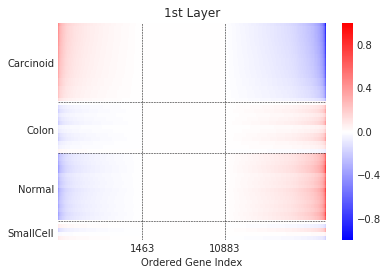

In [87]:
image1 = sns.heatmap(layer_reduced1, vmin=-1, vmax=1, cmap='bwr',
                     xticklabels=False, yticklabels='')

#image1.invert_yaxis()

plt.plot(list(image1.get_xlim()), [20,20], 'k--', linewidth = 0.5)
plt.plot(list(image1.get_xlim()), [33,33], 'k--', linewidth = 0.5)
plt.plot(list(image1.get_xlim()), [50,50], 'k--', linewidth = 0.5)
plt.plot([1462, 1462], list(image1.get_ylim()), 'k--', linewidth = 0.5)
plt.plot([10882-8000, 10882-8000], list(image1.get_ylim()), 'k--', linewidth = 0.5)
plt.yticks([10,27,42,53], ["Carcinoid","Colon","Normal","SmallCell"])
plt.xticks([1462, 10882-8000], ["1463", "10883"])
image1.set(xlabel = "Ordered Gene Index") 
plt.title("1st Layer")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
pass
plt.savefig('1stlayer.png')

In [92]:
#Layer2
u2,v2,s2,ite=ssvd(X-layer1)
layer2 = s2 * u2[:, None] * v2[None, :]
scale2=layer2/np.max(layer2)

In [93]:
col2_idx = np.argsort(v2)
col_sorted2 = scale2[:, col2_idx]
row2_idx1 = np.argsort(u2[:20])
row2_idx2 = np.argsort(u2[21:34])+20
row2_idx3 = np.argsort(u2[34:51])+33
row2_idx4 = np.argsort(u2[51:])+50
sortrow2_idx = np.append(np.append(row2_idx1, row2_idx2), np.append(row2_idx3, row2_idx4))
layer_sorted2 = col_sorted2[sortrow2_idx,:]
layer_important2 = np.hstack([layer_sorted2[:,:1488], layer_sorted2[:,1488+8000:]])


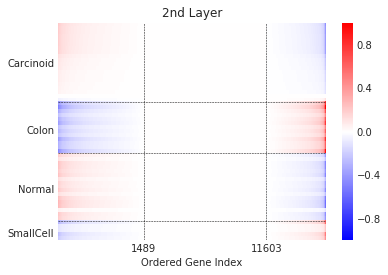

In [94]:
image2 = sns.heatmap(layer_important2, vmin=-1, vmax=1, annot_kws={'size': 1.5},cmap='bwr',
                     xticklabels=False, yticklabels='')
image2.set(xlabel = "Ordered Gene Index") 
plt.plot(list(image1.get_xlim()), [20,20], 'k--', linewidth = 0.5)
plt.plot(list(image1.get_xlim()), [33,33], 'k--', linewidth = 0.5)
plt.plot(list(image1.get_xlim()), [50,50], 'k--', linewidth = 0.5)
plt.plot([1489, 1489], list(image2.get_ylim()), 'k--', linewidth = 0.5)
plt.plot([11603-8000, 11603-8000], list(image2.get_ylim()), 'k--', linewidth = 0.5)
plt.yticks([10,27,42,53], ["Carcinoid","Colon","Normal","SmallCell"])
plt.xticks([1488, 11603-8000], ["1489", "11603"])
plt.title("2nd Layer")
#plt.figure(figsize=(5, 5))
pass
plt.savefig('2ndlayer.png',quality=80,optimize=True)

In [98]:
#Layer3
u3,v3,s3,ite=ssvd(X-layer1-layer2,merr = 10**(-2))
layer3 = s3 * u3[:, None] * v3[None, :]
scale3=layer3/np.max(layer3)

In [99]:
col_idx = np.argsort(v3)
#col_sorted1 = scale1[:, col_idx]
col_sorted3 = scale3[:, col_idx]
row_idx1 = np.argsort(u3[:20])
row_idx2 = np.argsort(u3[21:34])+20
row_idx3 = np.argsort(u3[34:51])+33
row_idx4 = np.argsort(u3[51:])+50
sortrow_idx = np.append(np.append(row_idx1, row_idx2), np.append(row_idx3, row_idx4))
layer_sorted3 = col_sorted3[sortrow_idx,:]
layer_important3 = np.hstack([layer_sorted3[:,:694], layer_sorted3[:,694+8000:]])


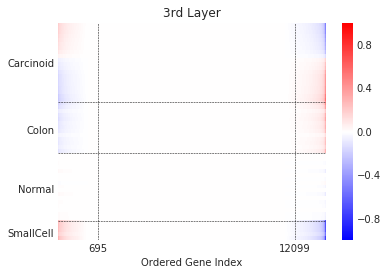

In [105]:
image3 = sns.heatmap(layer_important3, vmin=-1, vmax=1, cmap='bwr',
                     xticklabels=False, yticklabels='')
image3.set(xlabel = "Ordered Gene Index") 
plt.plot(list(image3.get_xlim()), [20,20], 'k--', linewidth = 0.5)
plt.plot(list(image3.get_xlim()), [33,33], 'k--', linewidth = 0.5)
plt.plot(list(image3.get_xlim()), [50,50], 'k--', linewidth = 0.5)
plt.plot([695, 695], list(image3.get_ylim()), 'k--', linewidth = 0.5)
plt.plot([12099-8000, 12099-8000], list(image3.get_ylim()), 'k--', linewidth = 0.5)
plt.yticks([10,27,42,53], ["Carcinoid","Colon","Normal","SmallCell"])
plt.xticks([694, 12099-8000], ["695", "12099"])
plt.title("3rd Layer")

pass
plt.savefig('3rdlayer.png')

### Figure 2

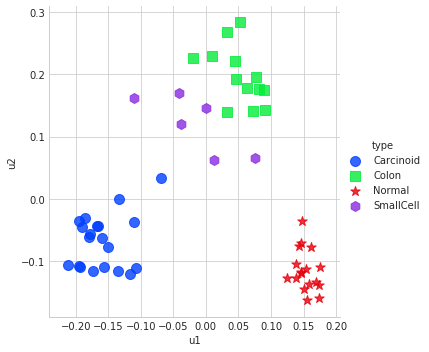

In [101]:
cate = np.repeat(["Carcinoid", "Colon", "Normal", "SmallCell"], 
                     [20, 13, 17, 6])
comp={'u1':u,'u2':u2,'u3':u3,'type':cate}
df_scatter=pd.DataFrame(comp)
sns.set_style(style = "whitegrid")
sns.lmplot(x="u1", y="u2", hue="type", data=df_scatter, 
           fit_reg=False, markers=["o", "s", "*", "h"],
          scatter_kws={"s": 100}, palette="bright")
pass
plt.savefig('scatter12.eps')

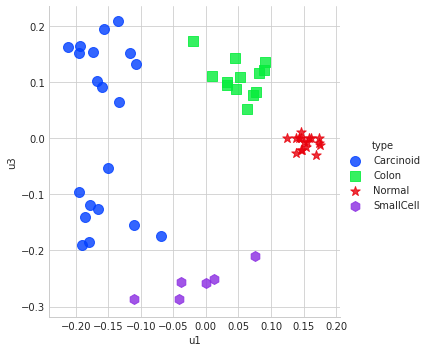

In [102]:
sns.set_style(style = "whitegrid")
sns.lmplot(x="u1", y="u3", hue="type", data=df_scatter, 
           fit_reg=False, markers=["o", "s", "*", "h"],
          scatter_kws={"s": 100}, palette="bright")
pass
plt.savefig('scatter13.eps')

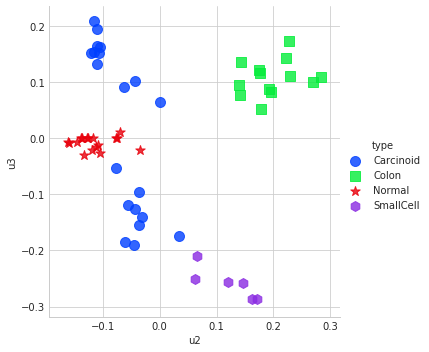

In [103]:
sns.set_style(style = "whitegrid")
sns.lmplot(x="u2", y="u3", hue="type", data=df_scatter, 
           fit_reg=False, markers=["o", "s", "*", "h"],
          scatter_kws={"s": 100}, palette="bright")
pass
plt.savefig('scatter23.eps')